## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Importing dataset

dataset = pd.read_csv("Mall_Customers.csv")

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
X = dataset.iloc[:,[3,4]].values

## Using elbow method for finding optimal number of cluters

In [13]:
wcss = []

In [14]:
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= "k-means++", random_state=42)
  # fit functiom
  kmeans.fit(X)
  # Commpute wcss
  wcss.append(kmeans.inertia_)

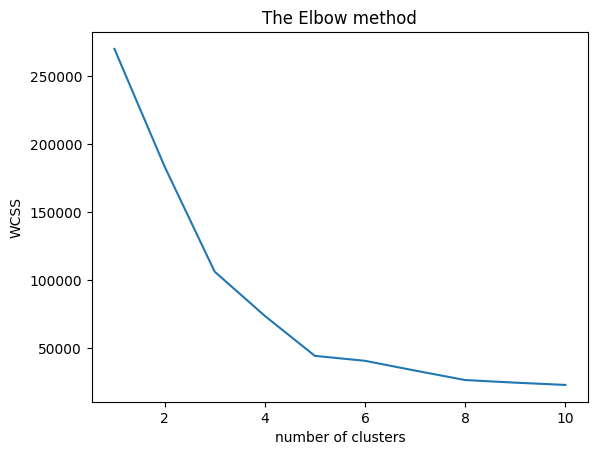

In [15]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
## Here for K=5, decrese in wcss slows down significantly.

## Training the K-Means model on the data set

In [19]:
kmeans = KMeans(n_clusters=5,  init= "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualize the Clusters

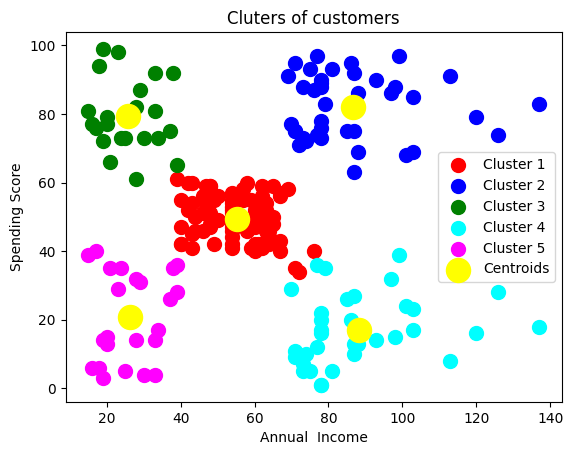

In [20]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label= 'Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label= 'Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label= 'Cluster 5')
# selecting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title("Cluters of customers")
plt.xlabel("Annual  Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [21]:
## Based on different clusters, targeted marekting strategies can be adopted.